In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Regressão linear e Regressão linear multipla
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression()

In [5]:
X = df[['highway-mpg']]
Y = df['price']

In [6]:
# Fit no modelo
lm.fit(X,Y)

LinearRegression()

In [7]:
# Predição
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
lm.intercept_

38423.305858157386

In [9]:
lm.coef_

array([-821.73337832])

In [10]:
# Questão 1: a) Crie uma regressão linear chamada "lm1"
lm1 = LinearRegression()

In [11]:
# Questão 1: b) Treino o modelo usando "engine-size" como a variável independente e "price" como a variávei dependente
X = df[['engine-size']]
Y=df['price']

In [12]:
lm1.fit(X,Y)
lm1

LinearRegression()

In [14]:
#Questão 1: c) Encontre o slope e intercept do modelo
lm1.intercept_

-7963.338906281046

In [15]:
lm1.coef_

array([166.86001569])

In [16]:
#Questão 1: d) Qual a equação que prediz a linha? Você pode usar x e yhat ou "engine-size" ou "price"
Yhat= -7963.34 + 166.86*X
print(Yhat)

     engine-size
0       13728.46
1       13728.46
2       17399.38
3       10224.40
4       14729.62
..           ...
196     15563.92
197     15563.92
198     20903.44
199     16231.36
200     15563.92

[201 rows x 1 columns]


In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
# Fit
lm.fit(Z, df['price'])

LinearRegression()

In [19]:
lm.intercept_

-15806.624626329223

In [20]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [22]:
# Questão 2: a) Crie e treino um modelo de regressão linear multiplo "lm2" aonde a resposta é "price", e a variável de predição
# são "normalized-losses" e "highway-mpg".
lm2 = LinearRegression()
Z = df[['normalized-losses', 'highway-mpg']]
lm2.fit(Z, df['price'])

LinearRegression()

In [23]:
# Questão 2: b) Ache o coeficiente do modelo
lm2.coef_

array([   1.49789586, -820.45434016])

(0.0, 48167.972641002394)

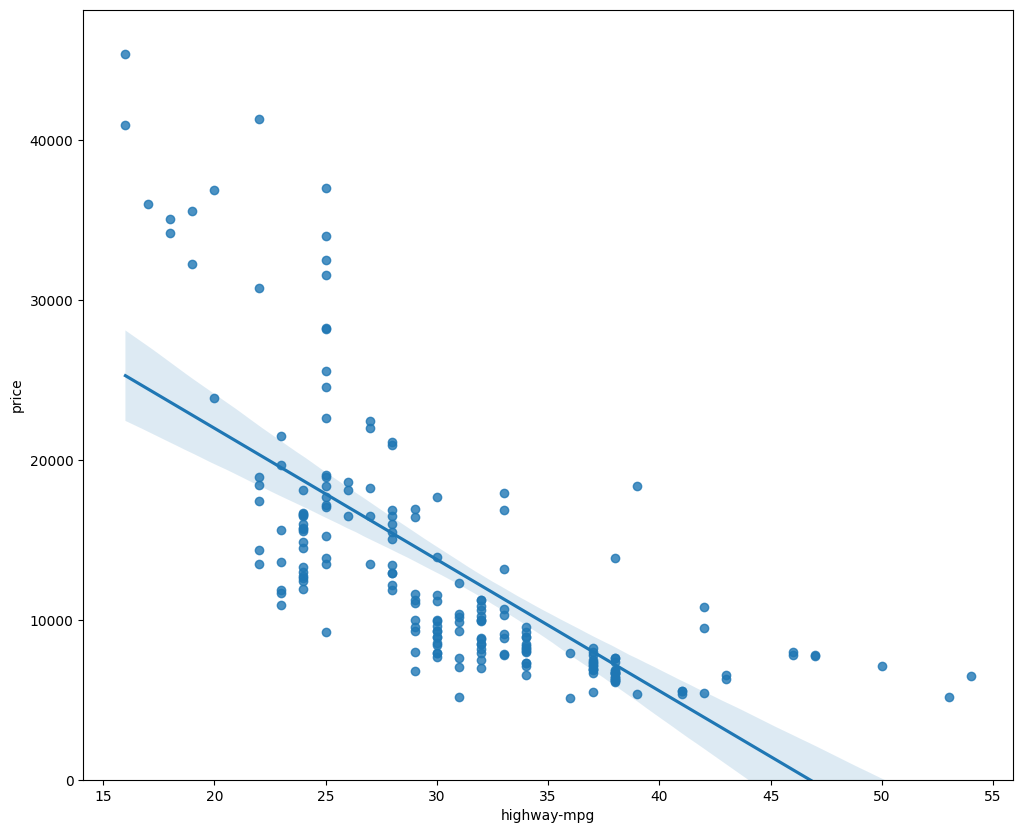

In [24]:
# Validação do modelo usando visualização
import seaborn as sns
%matplotlib inline

#Plot de regressão
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

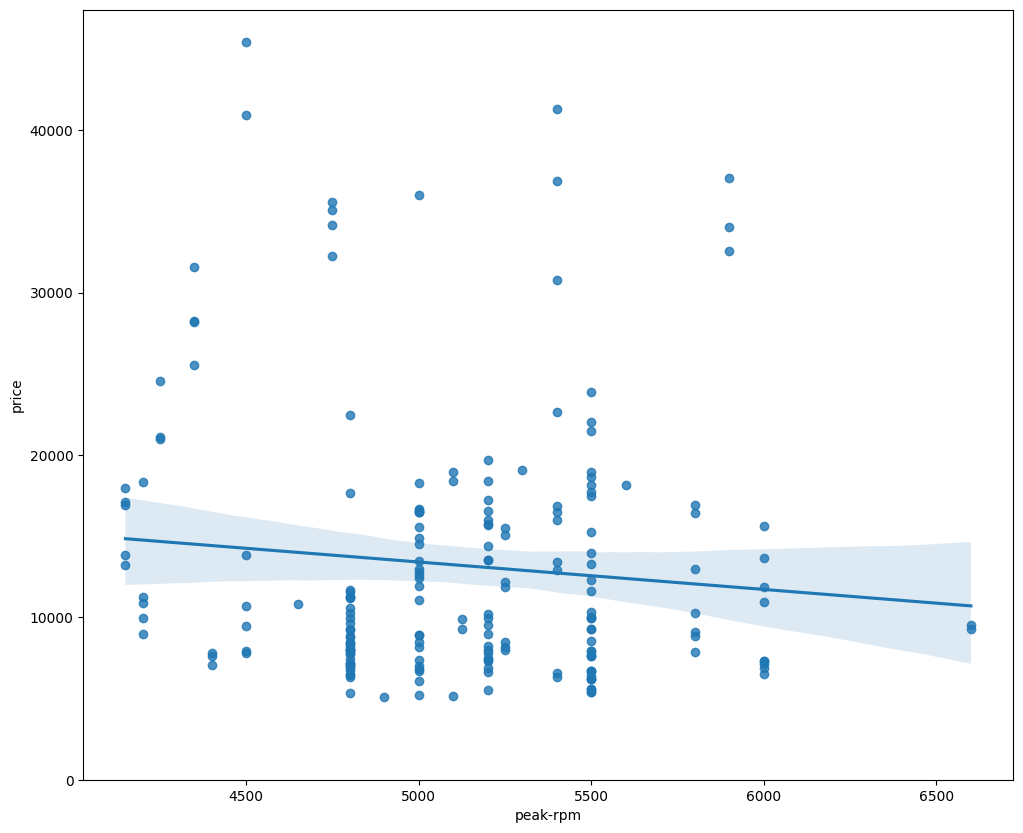

In [25]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [26]:
# Questão 3: Dados os plots de regressão acima, é "peak-rpm" ou "highway-mpg" mais fortemente correlacionado com "price"?
# Use o método .corr() para verificar a resposta
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


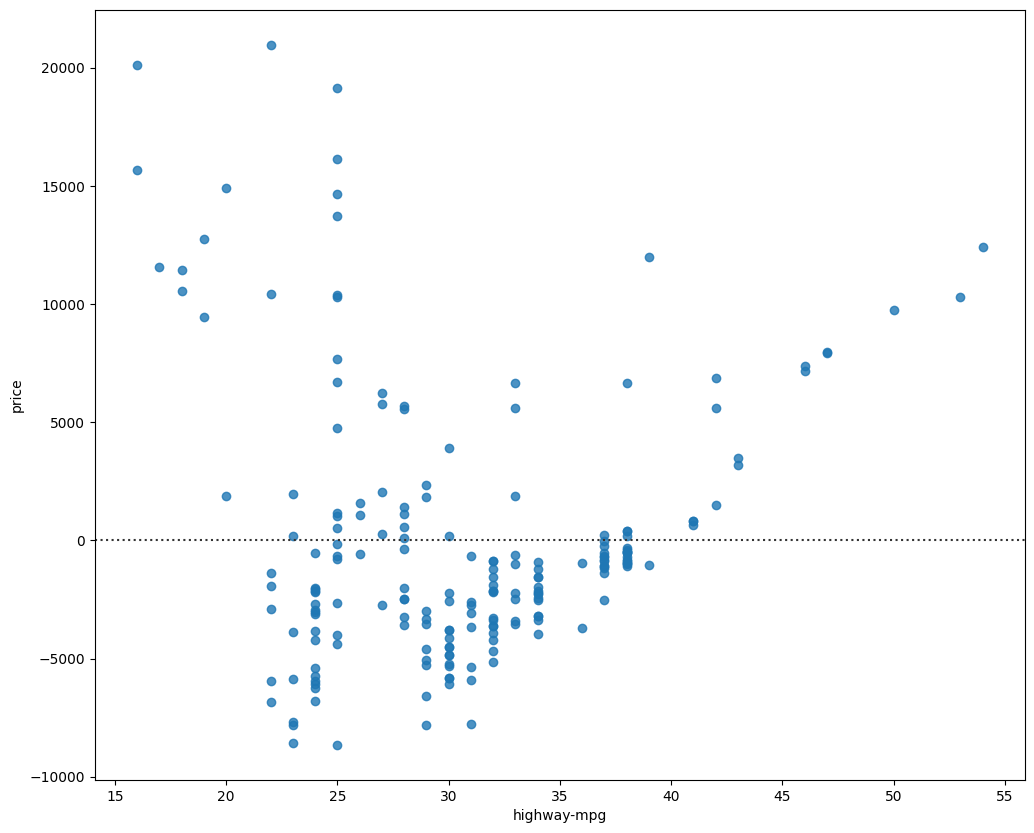

In [27]:
# Plot residual
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [29]:
Y_hat = lm2.predict(Z)

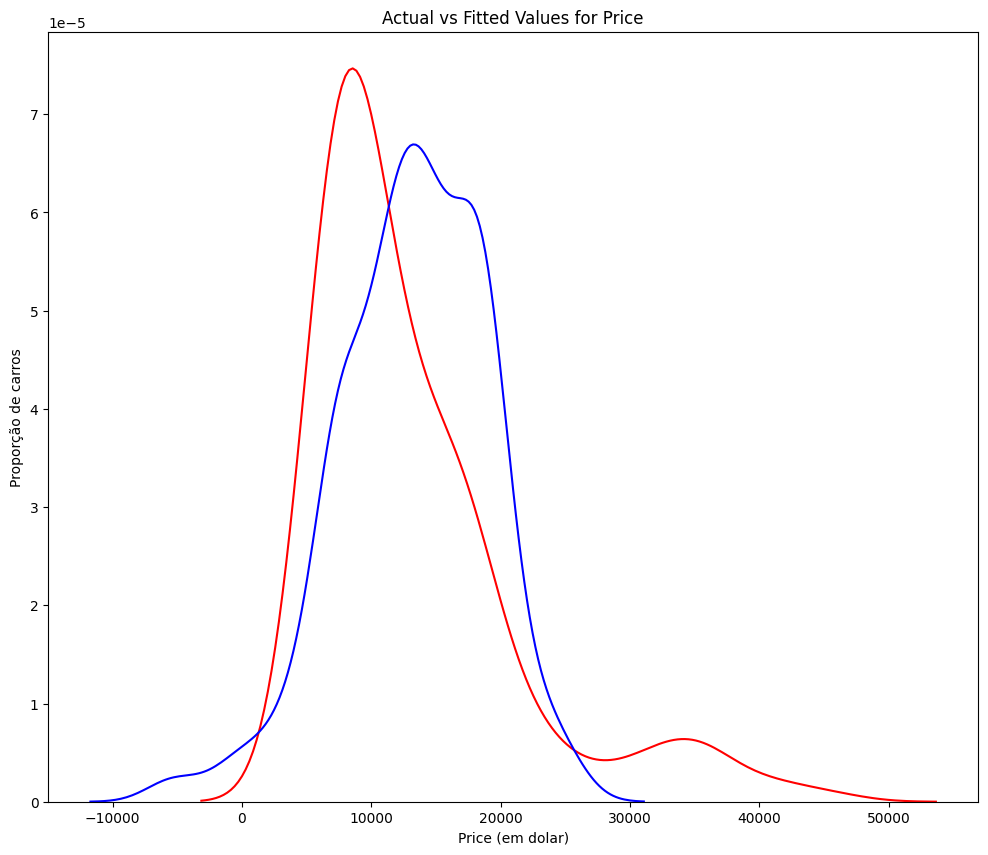

In [33]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label="Actual Value")
sns.distplot(Y_hat, hist=False, color='b', label="Fitted Values", ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (em dolar)")
plt.ylabel('Proporção de carros')

plt.show()
plt.close()